In [122]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import numpy as np
from fcmeans import FCM
%matplotlib inline

In [123]:
df = pd.read_csv("income.csv")
df

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income_level
0,39,77516,13,2174,0,40,0
1,50,83311,13,0,0,13,0
2,38,215646,9,0,0,40,0
3,53,234721,7,0,0,40,0
4,28,338409,13,0,0,40,0
...,...,...,...,...,...,...,...
48837,39,215419,13,0,0,36,0
48838,64,321403,9,0,0,40,0
48839,38,374983,13,0,0,50,0
48840,44,83891,13,5455,0,40,0


In [124]:
df['income_level'].value_counts()

0    37155
1    11687
Name: income_level, dtype: int64

In [125]:
df['capital_loss'].value_counts()

0       46560
1902      304
1977      253
1887      233
2415       72
        ...  
1539        1
1870        1
1911        1
2465        1
1421        1
Name: capital_loss, Length: 99, dtype: int64

In [126]:
array = np.array(df.values)
x = df.iloc[:,0:6]
y = df.iloc[:,6]

In [127]:
y

0        0
1        0
2        0
3        0
4        0
        ..
48837    0
48838    0
48839    0
48840    0
48841    1
Name: income_level, Length: 48842, dtype: int64

In [128]:
x

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
48837,39,215419,13,0,0,36
48838,64,321403,9,0,0,40
48839,38,374983,13,0,0,50
48840,44,83891,13,5455,0,40


In [129]:
df.isnull().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
income_level      0
dtype: int64

In [130]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(x)
y_predicted

array([1, 1, 1, ..., 0, 1, 1])

In [131]:
df['cluster']=y_predicted
df.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income_level,cluster
0,39,77516,13,2174,0,40,0,1
1,50,83311,13,0,0,13,0,1
2,38,215646,9,0,0,40,0,1
3,53,234721,7,0,0,40,0,0
4,28,338409,13,0,0,40,0,0


In [132]:
km.cluster_centers_

array([[3.69956075e+01, 3.26006118e+05, 9.91364029e+00, 9.99163934e+02,
        8.29492509e+01, 4.03721861e+01],
       [3.92256947e+01, 1.41504548e+05, 1.01361760e+01, 1.10729172e+03,
        8.91105755e+01, 4.04401130e+01]])

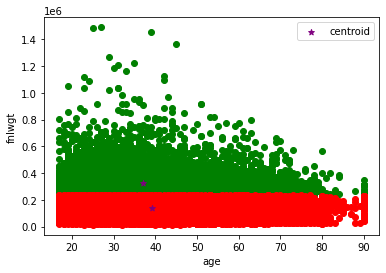

In [133]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
#df3 = df[df.cluster==2]
plt.scatter(df1.age,df1['fnlwgt'],color='green')
plt.scatter(df2.age,df2['fnlwgt'],color='red')
#plt.scatter(df3.age,df3['fnlwgt'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('age')
plt.ylabel('fnlwgt')
plt.legend()

In [135]:
labels = km.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == y_predicted)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 18596 out of 48842 samples were correctly labeled.
Accuracy score: 0.38


In [136]:
#Normalization
scaler = MinMaxScaler()

scaler.fit(df[['fnlwgt']])
df['fnlwgt'] = scaler.transform(df[['fnlwgt']])

scaler.fit(df[['age']])
df['age'] = scaler.transform(df[['age']])

scaler.fit(df[['capital_gain']])
df['capital_gain'] = scaler.transform(df[['capital_gain']])

scaler.fit(df[['capital_loss']])
df['capital_loss'] = scaler.transform(df[['capital_loss']])

In [137]:
df.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income_level,cluster
0,0.301370,0.044131,13,0.02174,0.0,40,0,1
1,0.452055,0.048052,13,0.00000,0.0,13,0,1
2,0.287671,0.137581,9,0.00000,0.0,40,0,1
3,0.493151,0.150486,7,0.00000,0.0,40,0,0
4,0.150685,0.220635,13,0.00000,0.0,40,0,0


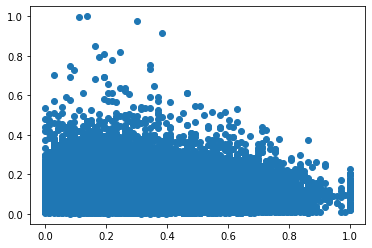

In [138]:
plt.scatter(df.age,df['fnlwgt'])

In [139]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df[['age','fnlwgt','capital_gain','capital_loss']])
#y_predicted = km.fit_predict(df[:,0:5])
y_predicted

array([1, 0, 1, ..., 1, 0, 1])

In [140]:
df['cluster']=y_predicted
df.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income_level,cluster
0,0.301370,0.044131,13,0.02174,0.0,40,0,1
1,0.452055,0.048052,13,0.00000,0.0,13,0,0
2,0.287671,0.137581,9,0.00000,0.0,40,0,1
3,0.493151,0.150486,7,0.00000,0.0,40,0,0
4,0.150685,0.220635,13,0.00000,0.0,40,0,1


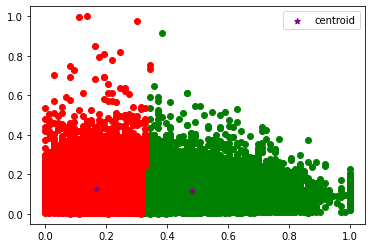

In [141]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
#df3 = df[df.cluster==2]
plt.scatter(df1.age,df1['fnlwgt'],color='green')
plt.scatter(df2.age,df2['fnlwgt'],color='red')
#plt.scatter(df3.age,df3['fnlwgt'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [142]:
#Reduce error
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['age','fnlwgt','capital_gain','capital_loss']])
    sse.append(km.inertia_)

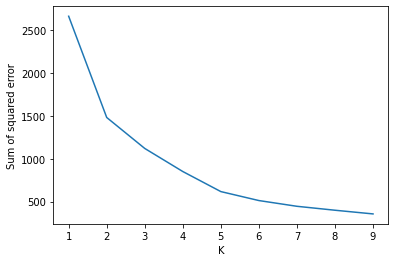

In [143]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [144]:
labels = km.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == y_predicted)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))


Result: 17677 out of 48842 samples were correctly labeled.
Accuracy score: 0.36


In [145]:
array = np.array(df.values)
x = array[:,0:6] #features

In [146]:
x

array([[3.01369863e-01, 4.41312077e-02, 1.30000000e+01, 2.17402174e-02,
        0.00000000e+00, 4.00000000e+01],
       [4.52054795e-01, 4.80517416e-02, 1.30000000e+01, 0.00000000e+00,
        0.00000000e+00, 1.30000000e+01],
       [2.87671233e-01, 1.37581311e-01, 9.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.00000000e+01],
       ...,
       [2.87671233e-01, 2.45378743e-01, 1.30000000e+01, 0.00000000e+00,
        0.00000000e+00, 5.00000000e+01],
       [3.69863014e-01, 4.84441332e-02, 1.30000000e+01, 5.45505455e-02,
        0.00000000e+00, 4.00000000e+01],
       [2.46575342e-01, 1.14918663e-01, 1.30000000e+01, 0.00000000e+00,
        0.00000000e+00, 6.00000000e+01]])

In [147]:
fcm = FCM(n_clusters = 2, m = 2, max_iter = 100, random_state = 2)
fcm.fit(x)

In [148]:
fcm_centers = fcm.centers
fcm_label = fcm.predict(x)

In [149]:
fcm_centers

array([[2.87340950e-01, 1.21130791e-01, 9.83264203e+00, 6.87781513e-03,
        1.70107279e-02, 3.63833887e+01],
       [3.16859495e-01, 1.17195657e-01, 1.08067675e+01, 2.14601573e-02,
        2.81895866e-02, 5.28102777e+01]])

In [150]:
np.unique(fcm_label)

array([0, 1], dtype=int64)

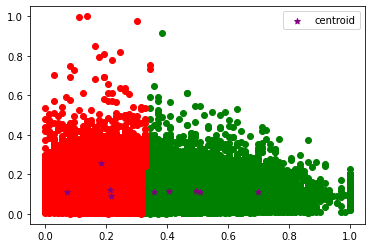

In [151]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
#df3 = df[df.cluster==2]
plt.scatter(df1.age,df1['fnlwgt'],color='green')
plt.scatter(df2.age,df2['fnlwgt'],color='red')
#plt.scatter(df3.age,df3['fnlwgt'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [153]:
labels = fcm_label

# check how many of the samples were correctly labeled
correct_labels = sum(y == fcm_label)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))


Result: 34680 out of 48842 samples were correctly labeled.
Accuracy score: 0.71
